# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/5_pytorch_retinanet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

# About the network

1. Paper on Focal Loss: https://arxiv.org/abs/1708.02002

2. Blog 1 on RetinaNet: https://medium.com/@14prakash/the-intuition-behind-retinanet-eb636755607d

3. Blog 2 on RetinaNet: https://blog.zenggyu.com/en/post/2018-12-05/retinanet-explained-and-demystified/

4. Blog 3 on RetinaNet: https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4

5. Blog 4 on RetinaNet: https://analyticsindiamag.com/what-is-retinanet-ssd-focal-loss/

6. Blog 5 on RetinaNet: https://towardsdatascience.com/object-detection-on-aerial-imagery-using-retinanet-626130ba2203

# COCO Format - 1

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |----images (img_dir)
          |                |
          |                |------Train (set_dir) (Train)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)
          |                |-------Val (set_dir) (Validation)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)  
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------instances_Val.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "images";
 - set_dir = "Train";
 
For ValSet
 - root_dir = "..sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "images";
 - set_dir = "Val";
 
 Note: Annotation file name too coincides against the set_dir

# COCO Format - 2

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---ImagesVal (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------instances_ImagesVal.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "./";
 - set_dir = "ImagesTrain";
 
 
  For ValSet
 - root_dir = "../sample_dataset";
 - coco_dir = "kangaroo";
 - img_dir = "./";
 - set_dir = "ImagesVal";
 
 Note: Annotation file name too coincides against the set_dir
 

# Sample Dataset Credits

    credits: https://github.com/experiencor/kangaroo

In [1]:
import os
import sys
sys.path.append("../../5_pytorch_retinanet/lib/");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
#Using training set structured in format 1
root_dir = "../sample_dataset";
coco_dir = "kangaroo";
img_dir = "images";
set_dir = "Images";

In [5]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=4, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Num training images: 164


In [6]:
#Using training set same as validation but structured in format 2
root_dir = "../sample_dataset";
coco_dir = "kangaroo";
img_dir = "./";
set_dir = "Images";

In [7]:
gtf.Val_Dataset(root_dir, coco_dir, img_dir, set_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Num validation images: 164


## Models available
  - resnet18
  - resnet34
  - resnet50
  - resnet101
  - resnet152

In [8]:
gtf.Model(model_name="resnet18");

In [9]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [10]:
gtf.Train(num_epochs=2, output_model_name="final_model.pt");

Epoch: 0 | Iteration: 0 | Classification loss: 1.13026 | Regression loss: 1.05500 | Running loss: 2.18526
Epoch: 0 | Iteration: 20 | Classification loss: 0.40657 | Regression loss: 0.87963 | Running loss: 1.84150
Epoch: 0 | Iteration: 40 | Classification loss: 0.30513 | Regression loss: 0.76312 | Running loss: 1.60294
Evaluating dataset
Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.90s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area

/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type 

Epoch: 1 | Iteration: 0 | Classification loss: 0.24188 | Regression loss: 0.74976 | Running loss: 1.58838
Epoch: 1 | Iteration: 20 | Classification loss: 0.28103 | Regression loss: 0.71709 | Running loss: 1.45005
Epoch: 1 | Iteration: 40 | Classification loss: 0.37449 | Regression loss: 0.92517 | Running loss: 1.38103
Evaluating dataset
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.155
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.507
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.016
 Average Precision  (AP) @[ IoU=0.50:0.95 | area

# Inference 

In [1]:
import os
import sys
sys.path.append("../../5_pytorch_retinanet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_path="final_model.pt");

In [5]:
class_list = ["kangaroo"];

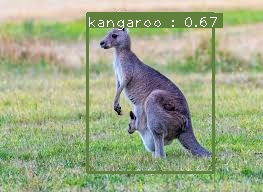

In [6]:
img_path = "../sample_dataset/kangaroo/test/kg1.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

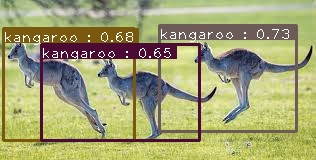

In [11]:
img_path = "../sample_dataset/kangaroo/test/kg2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.64);
from IPython.display import Image
Image(filename='output.jpg') 

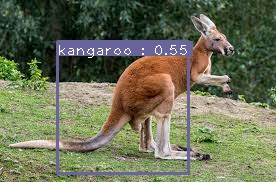

In [14]:
img_path = "../sample_dataset/kangaroo/test/kg3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

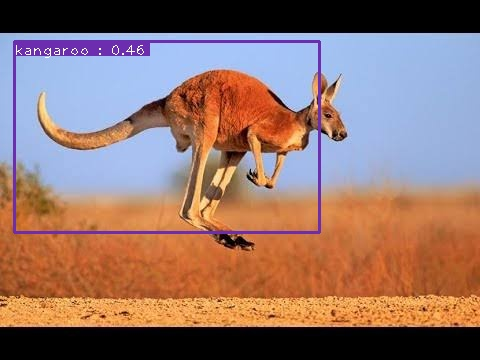

In [15]:
img_path = "../sample_dataset/kangaroo/test/kg4.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

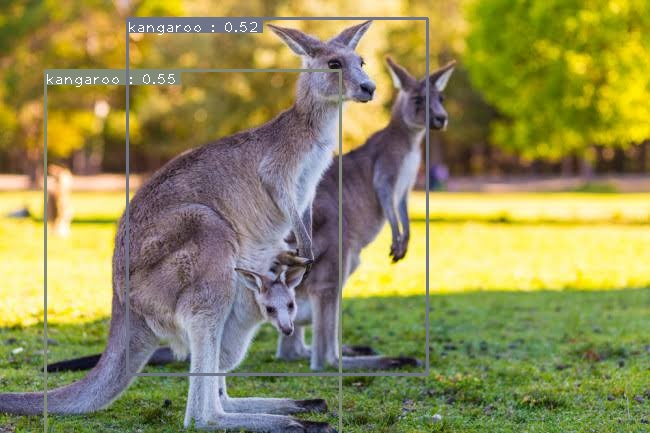

In [16]:
img_path = "../sample_dataset/kangaroo/test/kg5.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 